# HW1 Classifier Models and sklearn

## The Problem

Our overall goal is to build classifier models to predict `price_gt_1M` using the the other variables. You must use sklearn Pipelines that contain your preprocessing steps and your model estimation step. We did this in the class notes.

You should do your work in a Jupyter Notebook.

### Task 1 and 2 - Done

### Task 3 - EDA - SEE MODEL EXPLORATION EXAMPLE

I suggest you start by reading the csv file into a pandas dataframe. I called my dataframe, `housing_df`.
Then start with some basic EDA. You can certainly use automated tools such as pandas-profiling, skimpy or SweetViz as I showed in the class notes. Remember, when you run some of those tools, you **must** have your notebook open in the classic Jupyter Notebook interface (and **NOT** in Jupyter Lab) Check their docs to see if Jupyter Lab is supported yet. I pip installed SweetViz and it seems to be working fine now with Jupyter Lab. As we've seen, the reports get created as HTML documents. These should go in your output folder within your project.

## Preliminaries

In [208]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import commonly used libraries and magic command for inline plotting

In [211]:
# for pandas profiling report
# pip install ydata-profiling

In [213]:
# for sweetviz
# pip install sweetviz

In [215]:
import numpy as np
import pandas as pd
#from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
#import sweetviz

In [217]:
%matplotlib inline

I suggest you start by reading the csv file into a pandas dataframe. I called my dataframe, `housing_df`.

## Load data from csv

In [221]:
housing_df = pd.read_csv('./data/kc_house_data_classification.csv')

In [223]:
# gives head and tail rows
housing_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0


Then start with some basic EDA. You can certainly use automated tools such as pandas-profiling, skimpy or SweetViz as I showed in the class notes. Remember, when you run some of those tools, you **must** have your notebook open in the classic Jupyter Notebook interface (and **NOT** in Jupyter Lab) Check their docs to see if Jupyter Lab is supported yet. I pip installed SweetViz and it seems to be working fine now with Jupyter Lab. As we've seen, the reports get created as HTML documents. These should go in your output folder within your project.

In [226]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

All of the data types are float (may have decimal values) or integer (no decimal values)

In [229]:
housing_df.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price_gt_1M        int64
dtype: object

In [231]:
# developed and saved pandas profiling report
# profile = ProfileReport(housing_df, title="Profiling Report")
# profile.to_file("output/pandas_profiling_report.html")

## Summarize Pandas Profiling Report

In [234]:
# developed and saved sweetviz report
# report = sweetviz.analyze(housing_df)
# report.show_html("output/sweetviz_report.html")

## Observations:

 - Initial data types are float and integer
 
 - Categorical columns should be (other than price_gt_1M): waterfront, zipcode
 
 - Decisions made: I struggle with bedrooms, bathrooms and floors - even though they are a count, you cannot have 3.5 bedrooms, or 1.75 floors - the counts provide a specific label. I decided to keep them numerical for the homework, and also referenced: 
 
https://www.kaggle.com/code/tomasmantero/predicting-house-prices-keras-ann

The pandas Profiling Report listed four as categorical: waterfront, view, condition and price_gt_1M

The sweetviz_report listed five as categorical: floors, waterfront, view, condition and price_gt_1M

 - Blank, null or empty values: Profiling report showed no missing cells, 183 duplicate rows; sweetviz showed no missing values, 184 duplicates 
 
 - A few Variable observations: 
Most common number of bedrooms is 3 - there definitely appears to be errors in some of the bedroom counts (33 bedrooms in a 1,620 sq ft house and only 1.75 bathrooms?? Yikes...sounds like a typical family holiday)

Most common number of bathrooms is 2.5 (unfortunately there are 10 houses without bathrooms, and 13 homes with no bedrooms - hopefully they have a comfortable futon and live next door to a 24 hour gas station, I used to be a residential real estate appraiser...brings back memories)

General statement - most common is a 3 bedroom, 2.5 bath, 1 floor, no basement, non-waterfront, 0 view and 3 condition ratings, not renovated, priced lower than $1M home

I'm going with all the records, but there is probably room for more outlier cleanup:

https://medium.com/swlh/rudimentary-data-cleaning-techniques-using-king-county-wa-housing-dataset-f7716bdf827e

 - Features most correlated (before finalizing the categorical variables): 

<Axes: title={'center': 'Pearson Correlation Matrix'}>

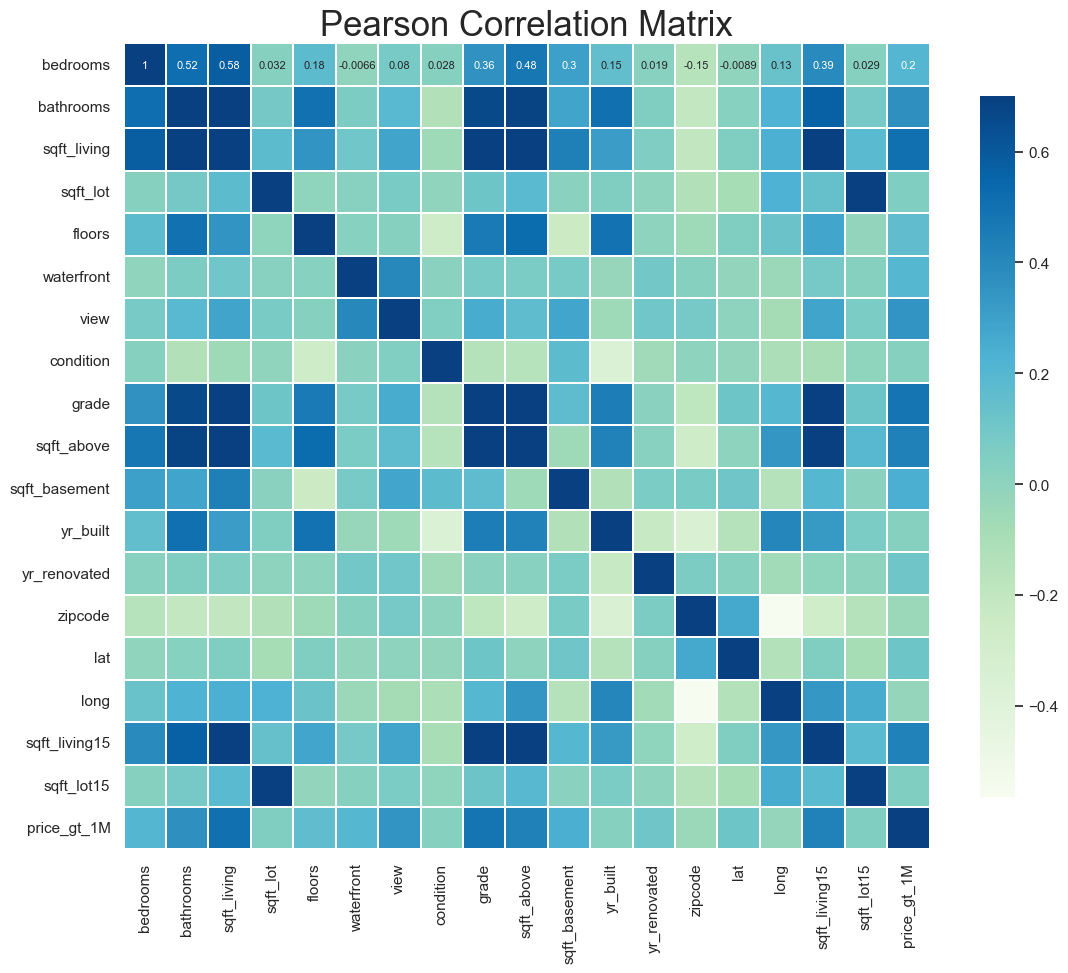

In [237]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix', fontsize=25)
sns.heatmap(housing_df.corr(), linewidths=0.25, vmax=0.7, square=True, cmap="GnBu", linecolor='w', 
            annot=True, annot_kws={"size":8}, cbar_kws={"shrink": .7})

# Seems there is a known issue with seaborn and placing all of the values - could downgrade and try but just leaving as is

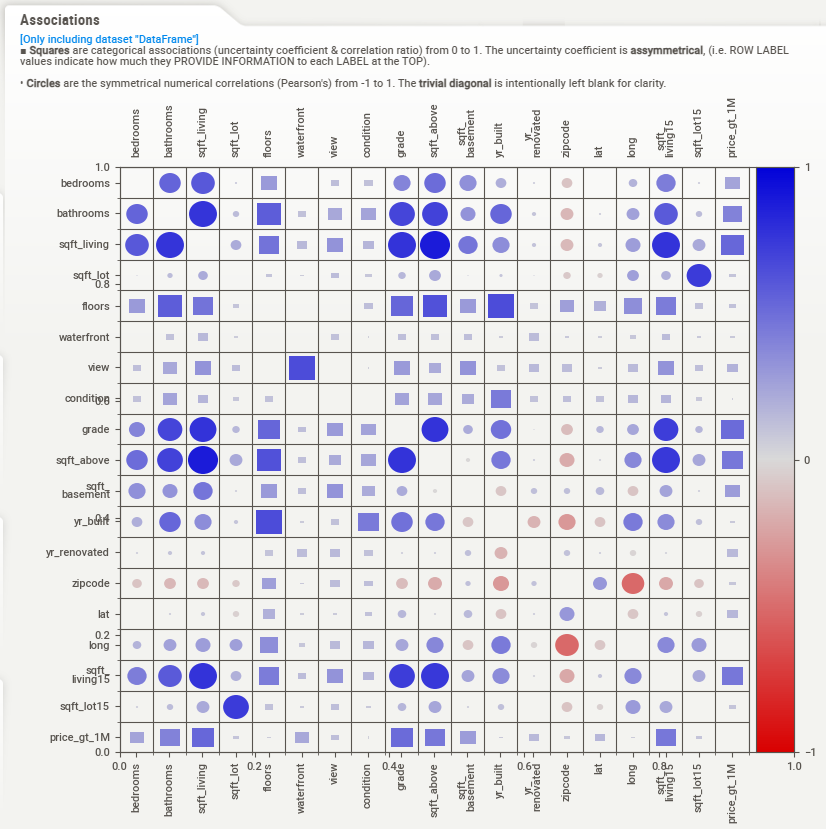

In [238]:
Image(filename = 'images/sweetviz_associations.PNG')

From the sweetviz association grid, sqft_above and sqft_living shows the highest correlation, with grade, bathrooms and sqft_living15 showing high correlations as well

### Task 4 - Categorize feature types

As we did in the Pump it Up class notes, we are going to need to create a list of categorical variables and a list of numeric variables so that we
can apply the appropriate pre-processing to each. In the notes we used the data type of the columns to create lists of numeric and categorical variables. That's not necessarily going to work here as all the variables will come in as numeric. So, you'll have to come up with another way to create lists of the categorical variables and the numeric variables. 

Since we are using regularization, all of the numeric variables will need to rescaled using the `StandardScaler`. You'll do this later as part of the `Pipeline`.   

Even though our target variable, `price_gt_1M`, is categorical, you do **NOT** need to do any preprocessing on it. As I mentioned in our class notes, scikit-learn will automatically detect that and will do any encoding needed on its own.

#### Preprocessing
For any variables that you decide should be treated as categorical in your models, use the `OneHotEncoder` on them in the preprocessing stage.

Be careful, just because a variable has a numeric datatype in the pandas dataframe, it does **not** mean that it's necessarily a numeric variable in the context of the classification models. Think about each column and look at your EDA reports and decide whether or not it's truly numeric or needs to be treated as categorical data in the models.


* I broke up the `housing_df` into two separate dataframes that I called `X` and `y`, to use in the models. Here's my code for that:
```
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]
```

In [245]:
# drop zip code and change waterfront to categorical, rest remain numeric
housing_df2 = housing_df.drop('zipcode',axis=1)
housing_df2["waterfront"] = housing_df2["waterfront"].astype("category")

In [247]:
housing_df2.dtypes

bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
price_gt_1M         int64
dtype: object

I decided to drop zip code since we have lat long, none are lumped

In [250]:
# Creating the initial X and y
X = housing_df2.iloc[:, 0:17]
y = housing_df2.iloc[:, 17]

In [252]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


The assertion confirms I didn't miss any columns - no error

In [255]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  int64   
 1   bathrooms      21613 non-null  float64 
 2   sqft_living    21613 non-null  int64   
 3   sqft_lot       21613 non-null  int64   
 4   floors         21613 non-null  float64 
 5   waterfront     21613 non-null  category
 6   view           21613 non-null  int64   
 7   condition      21613 non-null  int64   
 8   grade          21613 non-null  int64   
 9   sqft_above     21613 non-null  int64   
 10  sqft_basement  21613 non-null  int64   
 11  yr_built       21613 non-null  int64   
 12  yr_renovated   21613 non-null  int64   
 13  lat            21613 non-null  float64 
 14  long           21613 non-null  float64 
 15  sqft_living15  21613 non-null  int64   
 16  sqft_lot15     21613 non-null  int64   
dtypes: category(1), float64(4), int

In [257]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: price_gt_1M
Non-Null Count  Dtype
--------------  -----
21613 non-null  int64
dtypes: int64(1)
memory usage: 169.0 KB


In [259]:
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

all_cols = X.columns.tolist()

In [261]:
numeric_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [263]:
categorical_cols

['waterfront']

In [265]:
numeric_cols_idx = [X.columns.get_loc(c) for c in numeric_cols]
numeric_cols_idx

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [267]:
categorical_cols_idx = [X.columns.get_loc(c) for c in categorical_cols]
categorical_cols_idx

[5]

In [420]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

```
* Please use the following code for your data partitioning so that we all end up with the same training and test split:
```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)
```

# Pipeline for Steps 1 and 2

In [273]:
# Pipeline - l1 - C=1
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [275]:
# This is from the new 1.0 ColumnTransformer example. 
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront'])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=500, penalty='l1',
                                    solver='saga'))])

#### Model 0: The null model

We always start with the simplest possible model and we call it the *null model*. For binary classification models, the null model is usually just to predict that each observation will fall into whichever class is most prevalent. In other words, what would be the performance of a model in which we just predict 0 for everyone? Scikit-learn has a way to create simple null models for classification with the `sklearn.dummy.DummyClassifier` class. See https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html for the details. You must use this class to create your null model.

DummyClassifier Example:
import numpy as np
from sklearn.dummy import DummyClassifier
X = np.array([-1, 1, 1, 1])
y = np.array([0, 1, 1, 1])
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.predict(X)
dummy_clf.score(X, y)

In [278]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.9309674732799704

# Discuss the null model

In [281]:
# Further partition our training data into train and test sets to use for model fitting and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

#### Model 1: Ridge regression with C=1.0

In [284]:
# Pipeline - l1 - C=1
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [286]:
# Fit model on new training data - notice that clf is actually the Pipeline - l1 - C=1
clf.fit(X_train, y_train)

print(f"Training score: {clf.score(X_train, y_train):.3f}")
print(f"Test score: {clf.score(X_test, y_test):.3f}")

Training score: 0.961
Test score: 0.960


C:\Users\ahojd\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Create a plot of the coefficients (as we did in the notes). If you want to use that `coef_plot` function we used in the notes, you'll have
to make a few modifications because we only have one set of coefficients (since we have a binary classification problem as opposed to a 3-class problem in Pump it Up).

I couldn't get the model_exploration example to work with a single array, so I made up my own version

In [352]:
clf.named_steps['classifier'].coef_.shape

(1, 18)

In [354]:
clf.steps[1]

('classifier',
 LogisticRegression(C=1, max_iter=500, penalty='l1', solver='saga'))

In [381]:
clf.steps[1][1].coef_

array([[-4.45806422e-02,  3.31740550e-01,  5.81524953e-01,
         3.77079455e-02, -1.42726238e-03,  2.45416687e-01,
         4.03228386e-01,  1.38296327e+00,  3.44046274e-01,
         1.08373206e-01, -4.44338873e-01,  1.54281352e-01,
         7.53800911e-01, -8.51168939e-01,  4.07422732e-01,
        -8.44796678e-02, -2.22623081e+00,  0.00000000e+00]])

In [ ]:
# Array
data = clf.steps[1][1].coef_

# Plotting
plt.plot(data.flatten())  # Flattening the array to plot as a single line
plt.title('Array')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [414]:
def coef_plot(model, title=None):
    data = model.steps[1][1].coef_
    
    if title:
        plt.title(title)  
        
    plt.plot(data.flatten())  # Flattening the array to plot as a single line
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()


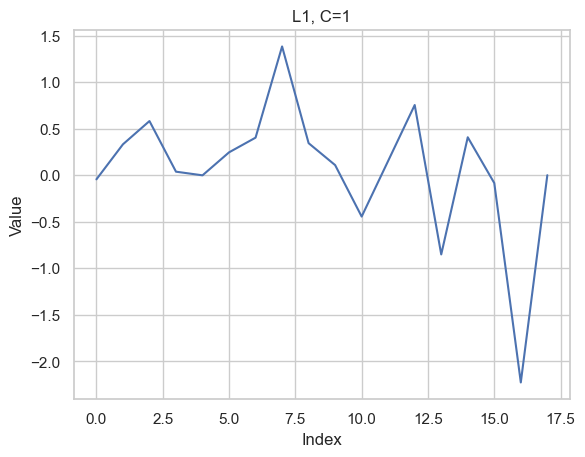

In [416]:
coef_plot(clf, 'L1, C=1')

Create confusion matrices for both training and test.

In [428]:
clf['classifier'].classes_

array([0, 1], dtype=int64)

Confusion matrix for train, without normalization
[[15947   180]
 [  494   669]]
Normalized confusion matrix for train
[[0.98883859 0.01116141]
 [0.42476354 0.57523646]]


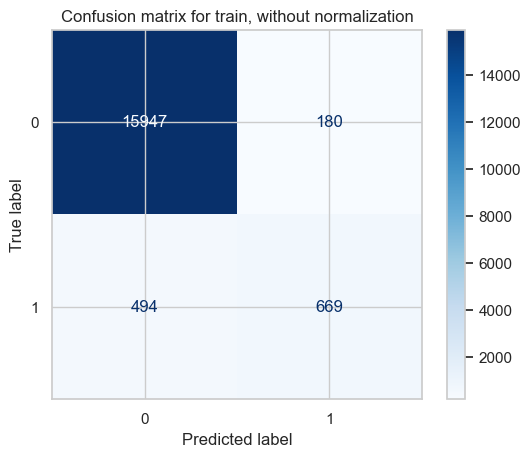

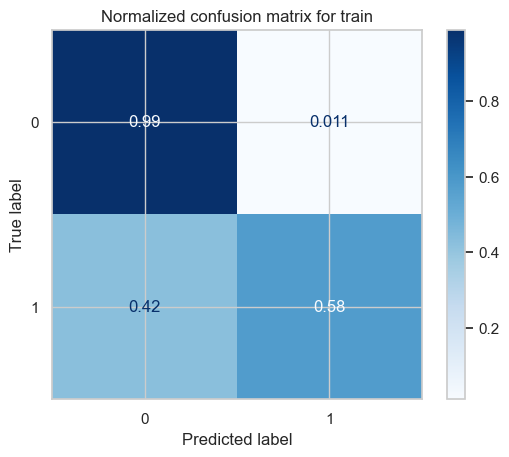

In [424]:
# Confusion matrix for Train
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3942   52]
 [ 123  206]]
Normalized confusion matrix for test
[[0.98698047 0.01301953]
 [0.37386018 0.62613982]]


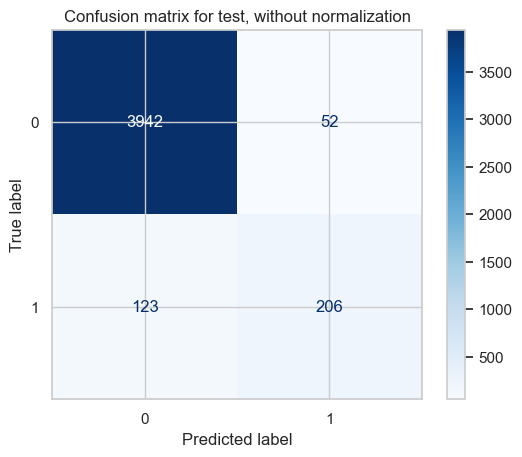

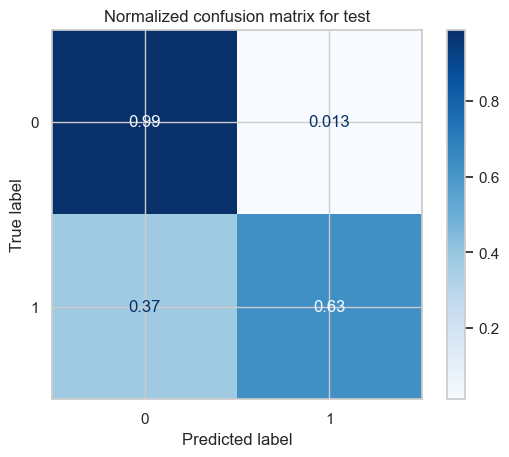

In [432]:
# Confusion matrix for Test
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Create confusion matrices for both training and test.

Also, create a plot of the coefficients (as we did in the notes). If you want to use that `coef_plot` function we used in the notes, you'll have
to make a few modifications because we only have one set of coefficients (since we have a binary classification problem as opposed to a 3-class problem in Pump it Up).